# Tarea - Caminata aleatoria y simulación montecarlo

KEVIN EMILIANO AYALA MONTOYA 745973

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

Importamos las librerías necesarias para la realización de esta tarea:

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Declararemos una función que eligirá aleatoriamente entre 1 y -1 y sera el cvalor de Xi

In [4]:
def Xi():
    lista_de_opciones = [1, -1]
    return random.choice(lista_de_opciones)

Ahora una función que nos calculará la posición y la almacenará en un array:

In [5]:
delta_t = 0.001
def posicion():
    wi = [0]
    for i in range(10):
        wi.append(wi[i-1] + Xi()*np.sqrt(delta_t))
    return wi

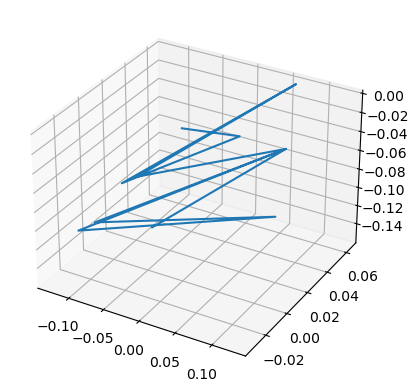

In [7]:
x = posicion()
y = posicion()
z = posicion()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', auto_add_to_figure=False)
ax.plot(x, y, z)
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

Primero declaramos la función que nos va a calcular el monto de la apuesta

In [8]:
def apuesta(C):
    if C >= 6:
        return C/2
    else:
        return 2

Después la función del volado, regresara de forma semialeatoria la elección entre 1 o -1 (estos)

In [9]:
def volado():
    opciones = [1, -1]
    return random.choice(opciones)

Definimos la funcion de la partida la cual se detendra cuando la capital para la apuesta sea 0.

In [10]:
def partida():
    C = [20]
    while C[-1] > 0:
        C.append(C[-1] + (volado()*apuesta(C[-1])))

    return C

Ahora graficaremos la partida (por cada ejecución de esta celda, se simulará una partida diferente, ya que todos los tiros son semialeatorios)

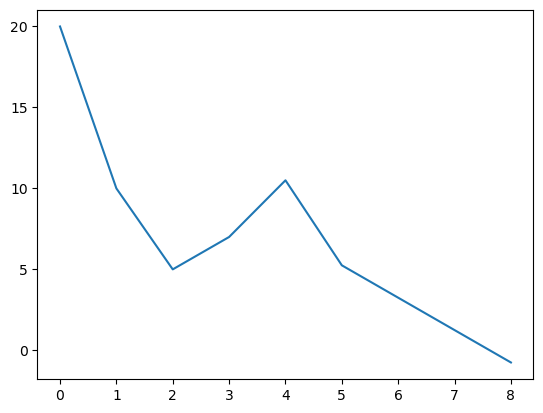

In [11]:
plt.figure()
r = partida()
plt.plot(r)

Ahora modificaremos nuestra función para que nos regrese el número de tiros realizados, hasta que el usuario quedé con una capital de cero.

In [12]:
def partidalp():
    C = [20]
    while C[-1] > 0:
        C.append(C[-1] + (volado()*apuesta(C[-1])))

    return len(C)

Crearemos un array vacío, y entraremos en un ciclo for que simulará 10,000 y agregará el número de tiros en este mismo array.

In [13]:
n_volados = []

for ii in range(10000):
    volados = partidalp()
    n_volados.append(volados)

Y ahora sacaremos el promedio de los tiros necesarios para que los 10,000 jugadores queden en ceros:

In [14]:
np.mean(n_volados)

27.1417

Y mostraremos el histograma de el número de volados (tiros):

(array([5.839e+03, 2.497e+03, 1.001e+03, 3.800e+02, 1.500e+02, 7.300e+01,
        4.000e+01, 1.400e+01, 2.000e+00, 4.000e+00]),
 array([  6. ,  24.8,  43.6,  62.4,  81.2, 100. , 118.8, 137.6, 156.4,
        175.2, 194. ]),
 <BarContainer object of 10 artists>)

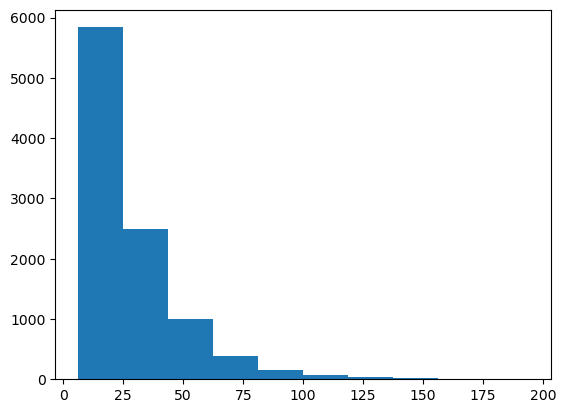

In [15]:
plt.figure()
plt.hist(n_volados)